In [146]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def checkWinOrTie(state):
    
    # Check rows
    for row in state:
        if len(set(row)) == 1 and row[0] != ".":
            return row[0]
    
    # Check columns
    for c in range(3):
        col = [state[r][c] for r in range(3)]
        if len(set(col)) == 1 and col[0] != ".":
            return col[0]
    
    # Check diagonals
    diag1 = [state[i][i] for i in range(3)]
    diag2 = [state[i][3-1-i] for i in range(3)]
    
    if len(set(diag1)) == 1 and diag1[0] != ".":
        return diag1[0]
    elif len(set(diag2)) == 1 and diag2[0] != ".":
        return diag2[0]
    
    # Check for tie
    is_tie = True
    for row in state:
        if "." in row:
            is_tie = False
            break
    if is_tie:
        return "tie"
    
    # If no winner and no tie, return "None"
    return "None"
    

In [82]:

def get_trajectory(inputState):
    
    trajectory = []
    
    copyState = [row[:] for row in inputState]
    
    states = [inputState]
    rewards = [1]
    
    while True:
        
        copy0 = [row[:] for row in copyState]
        
        #first, the player (O) makes a play

        empty = []

        for r in range(3):
            for c in range(3):
                if copyState[r][c] == ".":
                    empty.append((r,c))


        action = random.randint(0, len(empty) - 1)

        trans_prob_1 = 1 / len(empty)

        pos_to_take_1 = empty[action]

        copyState[pos_to_take_1[0]][pos_to_take_1[1]] = "O"
        
        reward = 1
        
        
        #check if player O wins the game, since player O is the second player to play, impossible to tie
        if checkWinOrTie(copyState) == "O":
            reward = 10
            
            current_content = (copy0, copyState, pos_to_take_1)
            
            trajectory.append(current_content) 
            
            states.append(copyState)
            rewards.append(reward)
            break
            
        
        copy1 = [row[:] for row in copyState]
        
        #then, the opponent player (X) makes a play
        
        empty = []
        
        for r in range(3):
            for c in range(3):
                if copyState[r][c] == ".":
                    empty.append((r,c))
        
        
        action = random.randint(0, len(empty) - 1)

        trans_prob_2 = 1 / len(empty)

        pos_to_take_2 = empty[action]

        copyState[pos_to_take_2[0]][pos_to_take_2[1]] = "X"
        
        #check if player O wins the game or tie, since player X plays first, imposs
        if checkWinOrTie(copyState) == "X":
            reward = -10
            
            current_content = (copy0, copyState, pos_to_take_1, trans_prob_2)
            
            trajectory.append(current_content) 
            
            states.append(copyState)
            rewards.append(reward)
            
            break
        elif checkWinOrTie(copyState) == "tie":
            reward = 0
            
            current_content = (copy0, copyState, pos_to_take_1,trans_prob_2)
            
            trajectory.append(current_content)
            
            states.append(copyState)
            rewards.append(reward)
            break
            
            
        
        copy2 = [row[:] for row in copyState]
        current_content = (copy0,copy2, pos_to_take_1, trans_prob_2)
#         print(current_content)
        trajectory.append(current_content)
    
        states.append(copy2)
        rewards.append(reward)
    
    return trajectory, states,rewards
        
                
    

In [338]:
def reward_to_go(state, reward):
    
    #len of state and reward must be the same
    
    i = 0
    
    n = len(state)
    
    while i < n:
        temp = i
        
        result = 0
        
        while temp < n:
            result += 0.9**(temp - i) * reward[temp]
            temp += 1
        
        print("reward to go for: ")
        print(state[i])
        print("is " + str(result))
        
        i += 1
    

In [339]:
test0 = [["X",".","."],[".",".","."],[".",".","."]]

result0, states0,rewards0 = get_trajectory(test0)

print("state sequence of trajectory 0: ")

for i in states0:
    print(i)

print("action and trans probability of sequence pairs ")
for i in result0:
    print(i)

    



state sequence of trajectory 0: 
[['X', '.', '.'], ['.', '.', '.'], ['.', '.', '.']]
[['X', '.', 'O'], ['.', 'X', '.'], ['.', '.', '.']]
[['X', 'X', 'O'], ['.', 'X', '.'], ['O', '.', '.']]
[['X', 'X', 'O'], ['.', 'X', '.'], ['O', 'X', 'O']]
action and trans probability of sequence pairs 
([['X', '.', '.'], ['.', '.', '.'], ['.', '.', '.']], [['X', '.', 'O'], ['.', 'X', '.'], ['.', '.', '.']], (0, 2), 0.14285714285714285)
([['X', '.', 'O'], ['.', 'X', '.'], ['.', '.', '.']], [['X', 'X', 'O'], ['.', 'X', '.'], ['O', '.', '.']], (2, 0), 0.2)
([['X', 'X', 'O'], ['.', 'X', '.'], ['O', '.', '.']], [['X', 'X', 'O'], ['.', 'X', '.'], ['O', 'X', 'O']], (2, 2), 0.3333333333333333)


In [340]:
reward_to_go(states0, rewards0)

reward to go for: 
[['X', '.', '.'], ['.', '.', '.'], ['.', '.', '.']]
is -4.580000000000001
reward to go for: 
[['X', '.', 'O'], ['.', 'X', '.'], ['.', '.', '.']]
is -6.200000000000001
reward to go for: 
[['X', 'X', 'O'], ['.', 'X', '.'], ['O', '.', '.']]
is -8.0
reward to go for: 
[['X', 'X', 'O'], ['.', 'X', '.'], ['O', 'X', 'O']]
is -10.0


In [348]:
test1 = [["X",".","."],[".",".","."],[".",".","."]]

result1, states1,rewards1 = get_trajectory(test1)

print("state sequence of trajectory 1: ")

for i in states1:
    print(i)

print(" ")
print("action and transition probability of sequence pairs. Format: (state1, state2, action, transition probability)")
for i in result1:
    print(i)

print(" ")

    
reward_to_go(states1, rewards1)


state sequence of trajectory 1: 
[['X', '.', '.'], ['.', '.', '.'], ['.', '.', '.']]
[['X', 'X', 'O'], ['.', '.', '.'], ['.', '.', '.']]
[['X', 'X', 'O'], ['X', '.', 'O'], ['.', '.', '.']]
[['X', 'X', 'O'], ['X', '.', 'O'], ['.', '.', 'O']]
 
action and transition probability of sequence pairs. Format: (state1, state2, action, transition probability)
([['X', '.', '.'], ['.', '.', '.'], ['.', '.', '.']], [['X', 'X', 'O'], ['.', '.', '.'], ['.', '.', '.']], (0, 2), 0.14285714285714285)
([['X', 'X', 'O'], ['.', '.', '.'], ['.', '.', '.']], [['X', 'X', 'O'], ['X', '.', 'O'], ['.', '.', '.']], (1, 2), 0.2)
([['X', 'X', 'O'], ['X', '.', 'O'], ['.', '.', '.']], [['X', 'X', 'O'], ['X', '.', 'O'], ['.', '.', 'O']], (2, 2))
 
reward to go for: 
[['X', '.', '.'], ['.', '.', '.'], ['.', '.', '.']]
is 10.0
reward to go for: 
[['X', 'X', 'O'], ['.', '.', '.'], ['.', '.', '.']]
is 10.000000000000002
reward to go for: 
[['X', 'X', 'O'], ['X', '.', 'O'], ['.', '.', '.']]
is 10.0
reward to go for: 
[['X

In [350]:
test2 = [[".","X","."],[".",".","."],[".",".","."]]

result2, states2,rewards2 = get_trajectory(test2)

print("state sequence of trajectory 2: ")

for i in states2:
    print(i)

print(" ")
print("action and transition probability of sequence pairs. Format: (state1, state2, action, transition probability)")
for i in result2:
    print(i)

print(" ")

    
reward_to_go(states2, rewards2)


state sequence of trajectory 2: 
[['.', 'X', '.'], ['.', '.', '.'], ['.', '.', '.']]
[['.', 'X', '.'], ['X', '.', '.'], ['.', 'O', '.']]
[['.', 'X', '.'], ['X', '.', 'X'], ['.', 'O', 'O']]
[['.', 'X', '.'], ['X', 'O', 'X'], ['X', 'O', 'O']]
[['X', 'X', 'O'], ['X', 'O', 'X'], ['X', 'O', 'O']]
 
action and transition probability of sequence pairs. Format: (state1, state2, action, transition probability)
([['.', 'X', '.'], ['.', '.', '.'], ['.', '.', '.']], [['.', 'X', '.'], ['X', '.', '.'], ['.', 'O', '.']], (2, 1), 0.14285714285714285)
([['.', 'X', '.'], ['X', '.', '.'], ['.', 'O', '.']], [['.', 'X', '.'], ['X', '.', 'X'], ['.', 'O', 'O']], (2, 2), 0.2)
([['.', 'X', '.'], ['X', '.', 'X'], ['.', 'O', 'O']], [['.', 'X', '.'], ['X', 'O', 'X'], ['X', 'O', 'O']], (1, 1), 0.3333333333333333)
([['.', 'X', '.'], ['X', 'O', 'X'], ['X', 'O', 'O']], [['X', 'X', 'O'], ['X', 'O', 'X'], ['X', 'O', 'O']], (0, 2), 1.0)
 
reward to go for: 
[['.', 'X', '.'], ['.', '.', '.'], ['.', '.', '.']]
is -3.122
r

In [352]:
test3 = [[".",".","X"],[".",".","."],[".",".","."]]

result3, states3,rewards3 = get_trajectory(test3)

print("state sequence of trajectory 3: ")

for i in states3:
    print(i)

print(" ")
print("action and transition probability of sequence pairs. Format: (state1, state2, action, transition probability)")
for i in result3:
    print(i)

print(" ")

    
reward_to_go(states3, rewards3)

state sequence of trajectory 3: 
[['.', '.', 'X'], ['.', '.', '.'], ['.', '.', '.']]
[['.', '.', 'X'], ['X', '.', '.'], ['.', '.', 'O']]
[['.', '.', 'X'], ['X', 'X', '.'], ['O', '.', 'O']]
[['X', 'O', 'X'], ['X', 'X', '.'], ['O', '.', 'O']]
[['X', 'O', 'X'], ['X', 'X', '.'], ['O', 'O', 'O']]
 
action and transition probability of sequence pairs. Format: (state1, state2, action, transition probability)
([['.', '.', 'X'], ['.', '.', '.'], ['.', '.', '.']], [['.', '.', 'X'], ['X', '.', '.'], ['.', '.', 'O']], (2, 2), 0.14285714285714285)
([['.', '.', 'X'], ['X', '.', '.'], ['.', '.', 'O']], [['.', '.', 'X'], ['X', 'X', '.'], ['O', '.', 'O']], (2, 0), 0.2)
([['.', '.', 'X'], ['X', 'X', '.'], ['O', '.', 'O']], [['X', 'O', 'X'], ['X', 'X', '.'], ['O', '.', 'O']], (0, 1), 0.3333333333333333)
([['X', 'O', 'X'], ['X', 'X', '.'], ['O', '.', 'O']], [['X', 'O', 'X'], ['X', 'X', '.'], ['O', 'O', 'O']], (2, 1))
 
reward to go for: 
[['.', '.', 'X'], ['.', '.', '.'], ['.', '.', '.']]
is 10.0
reward t

In [358]:
test4 = [[".",".","."],["X",".","."],[".",".","."]]

result4, states4,rewards4 = get_trajectory(test4)

print("state sequence of trajectory 4: ")

for i in states4:
    print(i)

print(" ")
print("action and transition probability of sequence pairs. Format: (state1, state2, action, transition probability)")
for i in result4:
    print(i)

print(" ")

    
reward_to_go(states4, rewards4)

state sequence of trajectory 4: 
[['.', '.', '.'], ['X', '.', '.'], ['.', '.', '.']]
[['.', '.', '.'], ['X', '.', '.'], ['.', 'X', 'O']]
[['.', 'X', '.'], ['X', '.', 'O'], ['.', 'X', 'O']]
[['.', 'X', 'O'], ['X', '.', 'O'], ['.', 'X', 'O']]
 
action and transition probability of sequence pairs. Format: (state1, state2, action, transition probability)
([['.', '.', '.'], ['X', '.', '.'], ['.', '.', '.']], [['.', '.', '.'], ['X', '.', '.'], ['.', 'X', 'O']], (2, 2), 0.14285714285714285)
([['.', '.', '.'], ['X', '.', '.'], ['.', 'X', 'O']], [['.', 'X', '.'], ['X', '.', 'O'], ['.', 'X', 'O']], (1, 2), 0.2)
([['.', 'X', '.'], ['X', '.', 'O'], ['.', 'X', 'O']], [['.', 'X', 'O'], ['X', '.', 'O'], ['.', 'X', 'O']], (0, 2))
 
reward to go for: 
[['.', '.', '.'], ['X', '.', '.'], ['.', '.', '.']]
is 10.0
reward to go for: 
[['.', '.', '.'], ['X', '.', '.'], ['.', 'X', 'O']]
is 10.000000000000002
reward to go for: 
[['.', 'X', '.'], ['X', '.', 'O'], ['.', 'X', 'O']]
is 10.0
reward to go for: 
[['.

In [360]:
test5 = [[".",".","."],[".","X","."],[".",".","."]]

result5, states5,rewards5 = get_trajectory(test5)

print("state sequence of trajectory 5: ")

for i in states5:
    print(i)

print(" ")
print("action and transition probability of sequence pairs. Format: (state1, state2, action, transition probability)")
for i in result5:
    print(i)

print(" ")

    
reward_to_go(states5, rewards5)

state sequence of trajectory 5: 
[['.', '.', '.'], ['.', 'X', '.'], ['.', '.', '.']]
[['.', '.', '.'], ['.', 'X', 'X'], ['.', '.', 'O']]
[['.', 'O', '.'], ['X', 'X', 'X'], ['.', '.', 'O']]
 
action and transition probability of sequence pairs. Format: (state1, state2, action, transition probability)
([['.', '.', '.'], ['.', 'X', '.'], ['.', '.', '.']], [['.', '.', '.'], ['.', 'X', 'X'], ['.', '.', 'O']], (2, 2), 0.14285714285714285)
([['.', '.', '.'], ['.', 'X', 'X'], ['.', '.', 'O']], [['.', 'O', '.'], ['X', 'X', 'X'], ['.', '.', 'O']], (0, 1), 0.2)
 
reward to go for: 
[['.', '.', '.'], ['.', 'X', '.'], ['.', '.', '.']]
is -6.200000000000001
reward to go for: 
[['.', '.', '.'], ['.', 'X', 'X'], ['.', '.', 'O']]
is -8.0
reward to go for: 
[['.', 'O', '.'], ['X', 'X', 'X'], ['.', '.', 'O']]
is -10.0


In [361]:
# def value_iteration_notOptimal(state):
    
#     if checkWinOrTie(state) == "X":
#         return -10
#     elif checkWinOrTie(state) == "tie":
#         return 0
    
#     else:
        
#         copyState = [row[:] for row in state]
        
#         empty = []

#         for r in range(3):
#             for c in range(3):
#                 if copyState[r][c] == ".":
#                     empty.append((r,c))
        
        
#         value = 1
        
#         index = random.randint(0, len(empty) - 1)
        
        
#         action = empty.pop(index)
        
#         print(action)
        
#         copyState[action[0]][action[1]] = "O"
        
#         if checkWinOrTie(copyState) == "O":
#             return 10
        
        
#         trans_prob = 1/len(empty)
        
        
#         temp = 0
        
#         for a in empty:
            
#             copy2 = [row[:] for row in copyState]
            
#             copy2[a[0]][a[1]] = "X"
            
#             print(value_iteration_notOptimal(copy2))
            
#             temp += value_iteration_notOptimal(copy2)
        
        
#         return 1 + 0.9 * (temp / len(empty))
    

    

In [362]:
# test1 = [["X",".","X"],["O","O","."],["X",".","."]]


# print(value_iteration_notOptimal(test1))

In [15]:

match = {}
match[0] = "."
match[1] = "O"
match[2] = "X"

reverse_match = {}
reverse_match["."] = 0
reverse_match["O"] = 1
reverse_match["X"] = 2


def board_to_tuple(board):
    encoding = []

    for r in range(3):
        for c in range(3):
            encoding.append(reverse_match[board[r][c]])

    return tuple(encoding)

def tuple_to_board(tup):
    
    row0 = [".",".","."]
    row1 = [".",".","."]
    row2 = [".",".","."]
    
    
    for i in range(len(tup)):
        if i // 3 == 0:
            row0[i] = match[tup[i]]
        elif i // 3 == 1:
            row1[i-3] = match[tup[i]]
        
        else:
            row2[i-6] = match[tup[i]]
            
    
    return [row0, row1, row2]


In [408]:
#set up initial values of all the states

values = {}

for a in range(3):
    for b in range(3):
        for c in range(3):
            for d in range(3):
                for e in range(3):
                    for f in range(3):
                        for g in range(3):
                            for h in range(3):
                                for i in range(3):
                                    values[(a,b,c,d,e,f,g,h,i)] = 1
                                    
                                    
optimal_actions = {}


    
                                    

In [409]:

testBoard = (2,0,2,1,1,0,2,0,0)

testBoard2 = (1,2,1,0,0,2,2,1,2)

testBoard3 = (0,2,0,2,0,0,0,0,1)


def value_iteration(values, gamma):
    
    x_plot = []
    y_plot = []
    
    
    
    for state in values.keys():
        
        num_X = 0
        num_O = 0
        num_dot = 0

        for i in state:
            if i == 0:
                num_dot += 1
            elif i == 1:
                num_O += 1
            else:
                num_X += 1
        
        
        
                
        #check if it is a feasible state
        if num_X - num_O != 1 and num_X != num_O:
             continue
                  
                
        #decode tuple to board
        board = tuple_to_board(state)
        
        
        if checkWinOrTie(board) == "X":
            values[state] = -10
            continue
        elif checkWinOrTie(board) == "tie":
            values[state] = 0
            continue
        
        if num_X == num_O:     
            if checkWinOrTie(board) == "O":
                values[state] = 10
            
            continue
    
    
        empty = []

        for r in range(3):
            for c in range(3):
                if board[r][c] == ".":
                    empty.append((r,c))
                    
                    
        max_action = None
        max_action_value = -10
        
        for i in range(len(empty)):
            
            action = empty[i]
            
            total = 0
            
            spot_for_opponent = empty.copy()
            spot_for_opponent.pop(i)
            
            board[action[0]][action[1]] = "O"
            
#             if checkWinOrTie(board) == "O":
#                 board[action[0]][action[1]] = "."
                
#                 max_action_value = 10
#                 max_action = action
                
#                 break
            encoded = board_to_tuple(board)
    
            temp = values[encoded]
        
            if temp == 10:             
                board[action[0]][action[1]] = "."
                
                max_action_value = 10
                max_action = action
                
                break
            
            
            for spot in spot_for_opponent:
                board[spot[0]][spot[1]] = "X"
                
                encoded = board_to_tuple(board)
                
                total += values[encoded]
                
                board[spot[0]][spot[1]] = "."
            
            avg = total / len(spot_for_opponent)
            
            board[action[0]][action[1]] = "."
            
            
            if avg > max_action_value:
                max_action_value = avg
                max_action = action
        
#         if state == testBoard3:
#             print(max_action_value)
#             print(max_action)
        
        values[state] = 1 + gamma * max_action_value
        
        optimal_actions[state] = max_action

    
        


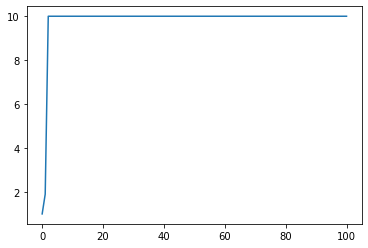

In [410]:
x_plot = [0]
y_plot = [1]


v0 = None
v1 = None

for i in range(100):
    value_iteration(values, 0.9)
    
    x_plot.append(i+1)
    y_plot.append(values[testBoard])
    
    if i == 0:
        v0 = np.array(list(values.values()))
    if i == 1:
        v1 = np.array(list(values.values()))

# print(np.linalg.norm(v0) - np.linalg.norm(v1))
    

plt.plot(x_plot, y_plot)

plt.show()
    
    

In [413]:
# print(v99)
print(np.linalg.norm(v0-v1))
print((np.linalg.norm(v0-v1) * 0.9**100) / 0.1)
# print((np.linalg.norm(v8-v9) * 0.9**100) / 0.1)

274.73106504361675
0.07297241405435262


In [475]:
print(y_plot[0])
print(y_plot[1])

1
1.9


In [65]:
# print(values)
print(optimal_actions[(0,0,0,0,1,0,2,0,2)])

(2, 1)


In [79]:
print(values[(0,2,1,2,0,2,0,0,1)])
print(optimal_actions[(0,2,1,2,0,2,0,0,1)])

10.0
(1, 1)


In [67]:
test = [1,2,3]

copy = test.copy()
copy.pop(0)
test

[1, 2, 3]

In [68]:
#question 4

In [396]:
# trajectory 1

# [['X', '.', '.'], ['.', '.', '.'], ['.', '.', '.']]
# [['X', 'X', 'O'], ['.', '.', '.'], ['.', '.', '.']]
# [['X', 'X', 'O'], ['X', '.', 'O'], ['.', '.', '.']]
# [['X', 'X', 'O'], ['X', '.', 'O'], ['.', '.', 'O']]


print("optimal value and action for [['X', '.', '.'], ['.', '.', '.'], ['.', '.', '.']]")
print(values[(2,0,0,0,0,0,0,0,0)])
print(optimal_actions[(2,0,0,0,0,0,0,0,0)])

print("optimal value and action for [['X', 'X', 'O'], ['.', '.', '.'], ['.', '.', '.']]")
print(values[(2,2,1,0,0,0,0,0,0)])
print(optimal_actions[(2,2,1,0,0,0,0,0,0)])

print("optimal value and action for [['X', 'X', 'O'], ['X', '.', 'O'], ['.', '.', '.']]")
print(values[(2,2,1,2,0,1,0,0,0)])
print(optimal_actions[(2,2,1,2,0,1,0,0,0)])

print("optimal value for [['X', 'X', 'O'], ['X', '.', 'O'], ['.', '.', 'O']]")
print(values[(2,2,1,2,0,1,0,0,1)])



optimal value and action for [['X', '.', '.'], ['.', '.', '.'], ['.', '.', '.']]
9.562599999999998
(1, 1)
optimal value and action for [['X', 'X', 'O'], ['.', '.', '.'], ['.', '.', '.']]
10.0
(1, 2)
optimal value and action for [['X', 'X', 'O'], ['X', '.', 'O'], ['.', '.', '.']]
10.0
(2, 2)
optimal value for [['X', 'X', 'O'], ['X', '.', 'O'], ['.', '.', 'O']]
10


In [397]:
#trajectory 2

# [['.', 'X', '.'], ['.', '.', '.'], ['.', '.', '.']]
# [['.', 'X', '.'], ['X', '.', '.'], ['.', 'O', '.']]
# [['.', 'X', '.'], ['X', '.', 'X'], ['.', 'O', 'O']]
# [['.', 'X', '.'], ['X', 'O', 'X'], ['X', 'O', 'O']]
# [['X', 'X', 'O'], ['X', 'O', 'X'], ['X', 'O', 'O']]


print("optimal value and action for [['.', 'X', '.'], ['.', '.', '.'], ['.', '.', '.']]")
print(values[(0,2,0,0,0,0,0,0,0)])
print(optimal_actions[(0,2,0,0,0,0,0,0,0)])

print("optimal value and action for [['.', 'X', '.'], ['X', '.', '.'], ['.', 'O', '.']]")
print(values[(0,2,0,2,0,0,0,1,0)])
print(optimal_actions[(0,2,0,2,0,0,0,1,0)])


print("optimal value and action for [['.', 'X', '.'], ['X', '.', 'X'], ['.', 'O', 'O']]")
print(values[(0,2,0,2,0,2,0,1,1)])
print(optimal_actions[(0,2,0,2,0,2,0,1,1)])

print("optimal value and action for [['.', 'X', '.'], ['X', 'O', 'X'], ['X', 'O', 'O']]")
print(values[(0,2,0,2,1,2,2,1,1)])
print(optimal_actions[(0,2,0,2,1,2,2,1,1)])

print("optimal value for [['X', 'X', 'O'], ['X', 'O', 'X'], ['X', 'O', 'O']]")
print(values[(2,2,1,2,1,2,2,1,1)])








optimal value and action for [['.', 'X', '.'], ['.', '.', '.'], ['.', '.', '.']]
9.736171428571428
(2, 0)
optimal value and action for [['.', 'X', '.'], ['X', '.', '.'], ['.', 'O', '.']]
9.028
(2, 0)
optimal value and action for [['.', 'X', '.'], ['X', '.', 'X'], ['.', 'O', 'O']]
10.0
(2, 0)
optimal value and action for [['.', 'X', '.'], ['X', 'O', 'X'], ['X', 'O', 'O']]
10.0
(0, 0)
optimal value for [['X', 'X', 'O'], ['X', 'O', 'X'], ['X', 'O', 'O']]
-10


In [399]:
#trajectory 3
# [['.', '.', 'X'], ['.', '.', '.'], ['.', '.', '.']]
# [['.', '.', 'X'], ['X', '.', '.'], ['.', '.', 'O']]
# [['.', '.', 'X'], ['X', 'X', '.'], ['O', '.', 'O']]
# [['X', 'O', 'X'], ['X', 'X', '.'], ['O', '.', 'O']]
# [['X', 'O', 'X'], ['X', 'X', '.'], ['O', 'O', 'O']]


print("optimal value and action for [['.', '.', 'X'], ['.', '.', '.'], ['.', '.', '.']]")
print(values[(0,0,2,0,0,0,0,0,0)])
print(optimal_actions[(0,0,2,0,0,0,0,0,0)])

print("optimal value and action for [['.', '.', 'X'], ['X', '.', '.'], ['.', '.', 'O']]")
print(values[(0,0,2,2,0,0,0,0,1)])
print(optimal_actions[(0,0,2,2,0,0,0,0,1)])

print("optimal value and action for [['.', '.', 'X'], ['X', 'X', '.'], ['O', '.', 'O']]")
print(values[(0,0,2,2,2,0,1,0,1)])
print(optimal_actions[(0,0,2,2,2,0,1,0,1)])

print("optimal value and action for [['X', 'O', 'X'], ['X', 'X', '.'], ['O', '.', 'O']]")
print(values[(2,1,2,2,2,0,1,0,1)])
print(optimal_actions[(2,1,2,2,2,0,1,0,1)])

print("optimal value for [['X', 'O', 'X'], ['X', 'X', '.'], ['O', 'O', 'O']]")
print(values[(2,1,2,2,2,0,1,1,1)])






optimal value and action for [['.', '.', 'X'], ['.', '.', '.'], ['.', '.', '.']]
9.562599999999998
(1, 1)
optimal value and action for [['.', '.', 'X'], ['X', '.', '.'], ['.', '.', 'O']]
9.514
(2, 0)
optimal value and action for [['.', '.', 'X'], ['X', 'X', '.'], ['O', '.', 'O']]
10.0
(2, 1)
optimal value and action for [['X', 'O', 'X'], ['X', 'X', '.'], ['O', '.', 'O']]
10.0
(2, 1)
optimal value for [['X', 'O', 'X'], ['X', 'X', '.'], ['O', 'O', 'O']]
10


In [400]:
#trajectory 4
# [['.', '.', '.'], ['X', '.', '.'], ['.', '.', '.']]
# [['.', '.', '.'], ['X', '.', '.'], ['.', 'X', 'O']]
# [['.', 'X', '.'], ['X', '.', 'O'], ['.', 'X', 'O']]
# [['.', 'X', 'O'], ['X', '.', 'O'], ['.', 'X', 'O']]


print("optimal value and action for [['.', '.', '.'], ['X', '.', '.'], ['.', '.', '.']]")
print(values[(0,0,0,2,0,0,0,0,0)])
print(optimal_actions[(0,0,0,2,0,0,0,0,0)])

print("optimal value and action for [['.', '.', '.'], ['X', '.', '.'], ['.', 'X', 'O']")
print(values[(0,0,0,2,0,0,0,2,1)])
print(optimal_actions[(0,0,0,2,0,0,0,2,1)])

print("optimal value and action for [['.', 'X', '.'], ['X', '.', 'O'], ['.', 'X', 'O']]")
print(values[(0,2,0,2,0,1,0,2,1)])
print(optimal_actions[(0,2,0,2,0,1,0,2,1)])


print("optimal value for [['.', 'X', 'O'], ['X', '.', 'O'], ['.', 'X', 'O']]")
print(values[(0,2,1,2,0,1,0,2,1)])









optimal value and action for [['.', '.', '.'], ['X', '.', '.'], ['.', '.', '.']]
9.73617142857143
(2, 2)
optimal value and action for [['.', '.', '.'], ['X', '.', '.'], ['.', 'X', 'O']
10.0
(0, 2)
optimal value and action for [['.', 'X', '.'], ['X', '.', 'O'], ['.', 'X', 'O']]
10.0
(0, 2)
optimal value for [['.', 'X', 'O'], ['X', '.', 'O'], ['.', 'X', 'O']]
10


In [402]:
#trajectory 5
# [['.', '.', '.'], ['.', 'X', '.'], ['.', '.', '.']]
# [['.', '.', '.'], ['.', 'X', 'X'], ['.', '.', 'O']]
# [['.', 'O', '.'], ['X', 'X', 'X'], ['.', '.', 'O']]
 
    
print("optimal value and action for [['.', '.', '.'], ['.', 'X', '.'], ['.', '.', '.']]")
print(values[(0,0,0,0,2,0,0,0,0)])
print(optimal_actions[(0,0,0,0,2,0,0,0,0)])

print("optimal value and action for [['.', '.', '.'], ['.', 'X', 'X'], ['.', '.', 'O']]")
print(values[(0,0,0,0,2,2,0,0,1)])
print(optimal_actions[(0,0,0,0,2,2,0,0,1)])

print("optimal value for [['.', 'O', '.'], ['X', 'X', 'X'], ['.', '.', 'O']]")
print(values[(0,1,0,2,2,2,0,0,1)])





optimal value and action for [['.', '.', '.'], ['.', 'X', '.'], ['.', '.', '.']]
8.312885714285715
(0, 0)
optimal value and action for [['.', '.', '.'], ['.', 'X', 'X'], ['.', '.', 'O']]
6.112
(1, 0)
optimal value for [['.', 'O', '.'], ['X', 'X', 'X'], ['.', '.', 'O']]
-10


In [81]:
#question 5

In [134]:
#initial state: [['.', '.', 'X'], ['.', '.', '.'], ['.', '.', '.']]

def get_trajectory_optimal(inputState):
    trajectory = []
    
    copyState = [row[:] for row in inputState]
    
    states = [inputState]
    rewards = [1]
    
    while True:
        
        copy0 = [row[:] for row in copyState]
        
        #first, the player (O) makes a play

        

        encoded = board_to_tuple(copyState)
        action_O = optimal_actions[encoded]

        copyState[action_O[0]][action_O[1]] = "O"
        
        reward = 1
        
        
        #check if player O wins the game, since player O is the second player to play, impossible to tie
        if checkWinOrTie(copyState) == "O":
            reward = 10
            
            current_content = (copy0, copyState, action_O)
            
            trajectory.append(current_content) 
            
            states.append(copyState)
            rewards.append(reward)
            break
            
        
        copy1 = [row[:] for row in copyState]
        
        #then, the opponent player (X) makes a play
        
        empty = []
        
        for r in range(3):
            for c in range(3):
                if copyState[r][c] == ".":
                    empty.append((r,c))
        
        
        action = random.randint(0, len(empty) - 1)

        trans_prob_2 = 1 / len(empty)

        pos_to_take_2 = empty[action]

        copyState[pos_to_take_2[0]][pos_to_take_2[1]] = "X"
        
        #check if player O wins the game or tie, since player X plays first, imposs
        if checkWinOrTie(copyState) == "X":
            reward = -10
            
            current_content = (copy0, copyState, action_O, trans_prob_2)
            
            trajectory.append(current_content) 
            
            states.append(copyState)
            rewards.append(reward)
            
            break
        elif checkWinOrTie(copyState) == "tie":
            reward = 0
            
            current_content = (copy0, copyState, action_O,trans_prob_2)
            
            trajectory.append(current_content)
            
            states.append(copyState)
            rewards.append(reward)
            break
            
            
        
        copy2 = [row[:] for row in copyState]
        current_content = (copy0,copy2, action_O, trans_prob_2)
#         print(current_content)
        trajectory.append(current_content)
    
        states.append(copy2)
        rewards.append(reward)
        
        
        
        reward_to_go_input = 0
        
        i = 0
        
    while i < len(rewards):
        reward_to_go_input += 0.9**i * rewards[i]

        i += 1
    
    return trajectory, reward_to_go_input, states, rewards



9.606339999999998


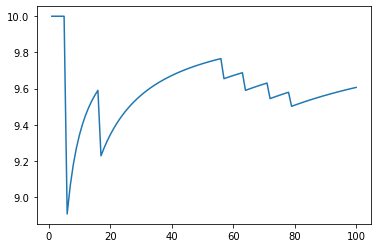

In [407]:
test0 = [[".",".","X"],[".",".","."],[".",".","."]]


x_plot = []
y_plot = []

total = 0
for i in range(100):
    
    trajectory, reward_to_go,states0,rewards0 = get_trajectory_optimal(test0)
    
    x_plot.append(i + 1)
    
    total += reward_to_go
    
    y_plot.append(total / (i+1))
    
    
print(total / 100)

plt.plot(x_plot, y_plot)
plt.show()




In [151]:
np.max([[1, 2], [3, 4]], axis = 1)

array([2, 4])

In [154]:
#question 7

In [175]:
Q = np.zeros([16,3])
Q[15,:] = 10
Q

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [10., 10., 10.]])

In [490]:
Q = np.zeros([14,3])

visit_to_state_Q = np.zeros(14)


def Q_learning(gamma, alpha, num_iteration, epsilon):
    
    for i in range(num_iteration):
        
        state = random.randint(0,1)
        
        
        
        while True:
            
            visit_to_state_Q[state] += 1
            
            if state == 12 or state == 13:
                Q[state,:] = 50
                break
            
            
            actions = [0,1,2]
            
            if state == 10 or state == 11:
                actions = [0,1]
            
            #epsilon greedy policy
            if np.random.rand() < epsilon: #try some new action  
                action = random.choice(actions)
            else:
                if len(actions) == 3:
                    action = np.argmax(Q[state, :])
                else:
                    if Q[state, 0] > Q[state, 1]:
                        action = 0
                    else:
                        action = 1
            
            next_state = None
            
            if action == 0: #move downward by 1 cell
                next_state = state + 2
            elif action == 2: #move downward by 2 cells
                next_state = state + 4
            else: #switch column and move downward by 1 cell
                if state % 2: #means the car is currently on the right side
                    next_state = state + 1
                else:
                    next_state = state +3
            
            
            reward = -1
            
#             visit_to_state_Q[next_state] += 1
            
#             alpha = 1/visit_to_state_Q[state]
            
            
            Q[state, action] = Q[state,action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state,action])
            
            state = next_state
        
    

In [491]:
Q_learning(0.9, 0.9, 1000, 0.4)

In [492]:
print(Q)

[[29.366 29.366 33.74 ]
 [29.366 29.366 33.74 ]
 [33.74  33.74  33.74 ]
 [33.74  33.74  33.74 ]
 [33.74  33.74  38.6  ]
 [33.74  33.74  38.6  ]
 [38.6   38.6   38.6  ]
 [38.6   38.6   38.6  ]
 [38.6   38.6   44.   ]
 [38.6   38.6   44.   ]
 [44.    44.     0.   ]
 [44.    44.     0.   ]
 [50.    50.    50.   ]
 [50.    50.    50.   ]]


In [493]:
print(Q[6])

[38.6 38.6 38.6]


In [494]:
print(Q[6, :])

[38.6 38.6 38.6]


In [479]:
test= np.zeros(14)
test[5]+= 1
test[5]+= 1
test[5]+= 1
test


array([0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0.])

In [310]:
Q2 = {} #key = tuple(carState (0-13), L-Row state(0-7), R-Row state (0-7), taking 2 spots(true or false))


for car in range(14):
    for p1 in range(-6, 8):
        for p2 in range(14):
            Q2[(car, p1, p2, True)] = [0,0,0]
            Q2[(car, p1, p2, False)] = [0,0,0]
            

def Q_learning_pedestrian(gamma, alpha, num_iteration, epsilon):
    
    for i in range(num_iteration):
        
        #we don't know where would the pedestrians start so we need to go through every one of them
        for j in range(8):
            for k in range(8):
                
                #define initial state
                car = random.randint(0,1)
                
                state = (car,j,k, False)
        
                while True:
                    
                    carPos = state[0]
                    p1 = state[1]
                    p2 = state[2]
                    
                    if carPos == 6:
                        if p1 == 3:
                            Q2[state] = [-50,-50,-50]
                            break
                    
                    elif carPos == 7:
                        if p1 == 4:
                            Q2[state] = [-50,-50,-50]
                            break
                            
                    
                    elif carPos == 8:
                        if state[3]:
                            if p1 ==3  or p2 == 3:
                                Q2[state] = [-50,-50,-50]
                                break
                        else:
                            if p2 == 3:
                                Q2[state] = [-50,-50,-50]
                                break
                            
                    elif carPos == 9:
                        if state[3]:
                            if p1 ==  4 or p2 == 4:
                                Q2[state] = [-50,-50,-50]
                                break
                        else:
                            if p2 == 4:
                                Q2[state] = [-50,-50,-50]
                                break
                                
                    elif carPos == 10 and state[3]:
                        if p2 == 3:
                            Q2[state] = [-50,-50,-50]
                            break
                    elif carPos == 11 and state[3]:
                        
                        if p2 == 4:
                            Q2[state] = [-50,-50,-50]
                            break
                    
                    
                    if carPos == 12 or carPos == 13:
                        Q2[state] = [50,50,50]
                        break


                    actions = [0,1,2]

                    if carPos == 10 or carPos == 11:
                        actions = [0,1]

                    #epsilon greedy policy
                    if np.random.rand() < epsilon: #try some new action  
                        action = random.choice(actions)
                    else:
                        if len(actions) == 3:
                            action = np.argmax(Q2[state])
                        else:
                            if Q2[state][0] > Q2[state][1]:
                                action = 0
                            else:
                                action = 1

                    next_state = None

                    if action == 0: #move downward by 1 cell
                        next_state = (carPos + 2, p1 -1 ,p2 + 1, False)
                    elif action == 2: #move downward by 2 cells
                        next_state = (carPos + 4, p1-1, p2+ 1, True)
                    else: #switch column and move downward by 1 cell
                        if carPos % 2: #means the car is currently on the right side
                            next_state = (carPos + 1, p1-1, p2 + 1, False)
                        else:
                            next_state = (carPos +3,p1-1, p2 + 1, False)


                    reward = -1

#                     print(state)

                    Q2[state][action] = Q2[state][action] + alpha * (reward + gamma * np.max(Q2[next_state]) - Q2[state][action])

                    state = next_state
        
        
        
        
        

In [311]:
Q_learning_pedestrian(0.9, 0.9, 1000, 0.4)

In [312]:
print(Q2[(6,5,2,True)])
print(Q2[(6,5,2,False)])



[-45.99999999999996, 38.6, -45.999999999549]
[-45.999999999549, 38.6, -46.0]


In [477]:
print((np.array(Q2[(6,5,2,True)]) + np.array(Q2[(6,5,2,False)])) / 2)

[-46.   38.6 -46. ]


In [422]:
print(Q2[(0,7,0,False)])

[29.366000000000003, 29.366000000000003, 33.74]


In [424]:
print(Q2[(4,6,1,True)])

[33.74, 33.74, 38.6]


In [425]:
print(Q2[(8,5,2,True)])

[38.6, 38.6, 44.0]


In [221]:
test = {}

test[2] = [1,1,10]

np.argmax(test[2])

2

In [222]:
for i in range(-6,8):
    print(i)

-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7


In [470]:
Q3 = {} #key = tuple(carState (0-13), L-Row state(0-7), R-Row state (0-7), car taking 2 spots(true or false), p1 taking 2 spots(bool), p2 taking 2 spots(bool))


for car in range(14):
    for p1 in range(-12, 8):
        for p2 in range(20):
            Q3[(car, p1, p2, True, False, False)] = [0,0,0]
            Q3[(car, p1, p2, True, False, True)] = [0,0,0]
            Q3[(car, p1, p2, True, True, False)] = [0,0,0]
            Q3[(car, p1, p2, True, True, True)] = [0,0,0]
            
            Q3[(car, p1, p2, False, False, False)] = [0,0,0]
            Q3[(car, p1, p2, False, False, True)] = [0,0,0]
            Q3[(car, p1, p2, False, True, False)] = [0,0,0]
            Q3[(car, p1, p2, False, True, True)] = [0,0,0]
            
            

def Q_learning_pedestrian_move2(gamma, alpha, num_iteration, epsilon):
    
    for i in range(num_iteration):
        
        #we don't know where would the pedestrians start so we need to go through every one of them
        for j in range(8):
            for k in range(8):
                
                #define initial state
                car = random.randint(0,1)
                
                state = (car,j,k, False, False, False)
        
                while True:
                    
                    carPos = state[0]
                    p1 = state[1]
                    p2 = state[2]
                    
                    p1_moved_2 = state[3]
                    p2_moved_2 = state[4]
                    
                    if carPos == 6:
                        if p1 == 3:
                            Q3[state] = [-50,-50,-50]
                            break
                        elif p1 == 2 and p1_moved_2:
                            Q3[state] = [-50,-50,-50]
                            break
                    
                    elif carPos == 7:
                        if p1 == 4:
                            Q3[state] = [-50,-50,-50]
                            break
                            
                        elif p1 == 3 and p1_moved_2:
                            Q3[state] = [-50,-50,-50]
                            break
                    
                    elif carPos == 8:
                        if state[3]:
                            if p1 ==3  or p2 == 3:
                                Q3[state] = [-50,-50,-50]
                                break
                            
                            elif (p2 == 4 and p2_moved_2) or (p1 == 2 and p1_moved_2):
                                Q3[state] = [-50,-50,-50]
                                break
                        else:
                            if p2 == 3:
                                Q3[state] = [-50,-50,-50]
                                break
                            elif p2 == 4 and p2_moved_2:
                                Q3[state] = [-50,-50,-50]
                                break
                            
                    elif carPos == 9:
                        if state[3]:
                            if p1 ==  4 or p2 == 4:
                                Q3[state] = [-50,-50,-50]
                                break
                            elif (p2 == 5 and p2_moved_2) or (p1 == 3 and p1_moved_2):
                                Q3[state] = [-50,-50,-50]
                                break
                        else:
                            if p2 == 4:
                                Q3[state] = [-50,-50,-50]
                                break
                            elif p2 == 5 and p2_moved_2:
                                Q3[state] = [-50,-50,-50]
                                break
                                
                    elif carPos == 10 and state[3]:
                        if p2 == 3:
                            Q3[state] = [-50,-50,-50]
                            break
                        elif p2 == 4 and p2_moved_2:
                            Q3[state] = [-50,-50,-50]
                            break
                    elif carPos == 11 and state[3]:
                        
                        if p2 == 4:
                            Q3[state] = [-50,-50,-50]
                            break
                        elif p2 == 5 and p2_moved_2:
                            Q3[state] = [-50,-50,-50]
                    
                    
                    if carPos == 12 or carPos == 13:
                        Q3[state] = [50,50,50]
                        break


                    actions = [0,1,2]

                    if carPos == 10 or carPos == 11:
                        actions = [0,1]

                    #epsilon greedy policy
                    if np.random.rand() < epsilon: #try some new action  
                        action = random.choice(actions)
                    else:
                        if len(actions) == 3:
                            action = np.argmax(Q3[state])
                        else:
                            if Q3[state][0] > Q3[state][1]:
                                action = 0
                            else:
                                action = 1

                    next_state = None
                    
                    p1Move2 = random.randint(0,1) #0 means only moves 1 cell, 1 means moves 2 cells
                    p2Move2 = random.randint(0,1)

                    if action == 0: #move downward by 1 cell
                        
                        if p1Move2 ==0 and p2Move2 == 0:
                            next_state = (carPos + 2, p1 -1 ,p2 + 1, False, False, False)
                        elif p1Move2 == 0 and p2Move2 == 1:
                            next_state = (carPos + 2, p1 -1 ,p2 + 2, False, False, True)
                        elif p1Move2 == 1 and p2Move2 == 0:    
                        
                            next_state = (carPos + 2, p1 -2 ,p2 + 1, False, True, False)
                        else:
                            next_state = (carPos + 2, p1 -2 ,p2 + 2, False, True, True)
                    elif action == 2: #move downward by 2 cells
#                         next_state = (carPos + 4, p1-1, p2+ 1, True)
                        
                        
                        
                        if p1Move2 ==0 and p2Move2 == 0:
                            next_state = (carPos + 4, p1 -1 ,p2 + 1, True, False, False)
                        elif p1Move2 == 0 and p2Move2 == 1:
                            next_state = (carPos + 4, p1 -1 ,p2 + 2, True, False, True)
                        elif p1Move2 == 1 and p2Move2 == 0:    
                        
                            next_state = (carPos + 4, p1 -2 ,p2 + 1, True, True, False)
                        else:
                            next_state = (carPos + 4, p1 -2 ,p2 + 2, True, True, True)
                        
                        
                        
                        
                    else: #switch column and move downward by 1 cell
                        if carPos % 2: #means the car is currently on the right side
                            
                            
#                             next_state = (carPos + 1, p1-1, p2 + 1, False)
                            
                            if p1Move2 ==0 and p2Move2 == 0:
                                next_state = (carPos + 1, p1 -1 ,p2 + 1, False, False, False)
                            elif p1Move2 == 0 and p2Move2 == 1:
                                next_state = (carPos + 1, p1 -1 ,p2 + 2, False, False, True)
                            elif p1Move2 == 1 and p2Move2 == 0:    

                                next_state = (carPos + 1, p1 -2 ,p2 + 1, False, True, False)
                            else:
                                next_state = (carPos + 1, p1 -2 ,p2 + 2, False, True, True)

                        else:
#                             next_state = (carPos +3 ,p1-1, p2 + 1, False)
                
                            if p1Move2 ==0 and p2Move2 == 0:
                                next_state = (carPos + 3, p1 -1 ,p2 + 1, False, False, False)
                            elif p1Move2 == 0 and p2Move2 == 1:
                                next_state = (carPos + 3, p1 -1 ,p2 + 2, False, False, True)
                            elif p1Move2 == 1 and p2Move2 == 0:    

                                next_state = (carPos + 3, p1 -2 ,p2 + 1, False, True, False)
                            else:
                                next_state = (carPos + 3, p1 -2 ,p2 + 2, False, True, True)



                    reward = -1

#                     print(state)

                    Q3[state][action] = Q3[state][action] + alpha * (reward + gamma * np.max(Q3[next_state]) - Q3[state][action])

                    state = next_state
        
        
        
        
        

In [471]:
Q_learning_pedestrian_move2(0.9, 0.9, 2000, 0.4)

In [474]:
print(Q3[(4,6,1, True, False, False)])
print(Q3[(4,6,1, True, False, True)])
print(Q3[(4,6,1, True, True, False)])
print(Q3[(4,6,1, True, True, True)])

print(Q3[(4,6,1, False, False, False)])
print(Q3[(4,6,1, False, False, True)])
print(Q3[(4,6,1, False, True, False)])
print(Q3[(4,6,1, False, True, True)])

[23.13971912362641, -41.7968871939, -41.500736289900004]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
